#### The 2D and 3D poses are extracted using the official implementation of the  work done by Wenhao Li et al. "Exploiting Temporal Contexts with Strided Transformer for 3D Human Pose Estimation", IEEE Transactions on Multimedia, 2022.
#### The code and installation instructions can be found at:  https://github.com/Vegetebird/StridedTransformer-Pose3D 

### Code for visualization of the 2D skeletal data

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from IPython.display import display, clear_output

In [4]:
from pathlib import Path

### Path to dataset ###
# output_dir = 'Z:/Data-Bris/Open_dataset_REMAP/Turning/Data/turning_2D3D_skeletons_coarsened/Turning_coarsen_CSV/Pt204_C_n_350/'
output_dir = Path('E:/学习工作/PD/pks/Turning/Data/turning_2D3D_skeletons_coarsened/Turning_coarsen_CSV/Pt204_C_n_350/')


In [5]:
# Load the keypoints.csv file using pathlib to construct the full path
keypoints_csv_path = output_dir / 'input_2D/keypoints.csv'

# Check if the file exists
if not keypoints_csv_path.exists():
    raise FileNotFoundError(f"File not found: {keypoints_csv_path}")

dimension = 2
number_of_joints = 17
keypoints_csv = np.loadtxt(keypoints_csv_path, delimiter=',')
keypoints = keypoints_csv.reshape(1,keypoints_csv.shape[0],number_of_joints, dimension)
print(f"Loaded keypoints with shape: {keypoints.shape}")

Loaded keypoints with shape: (1, 91, 17, 2)


## Draw 2D plot

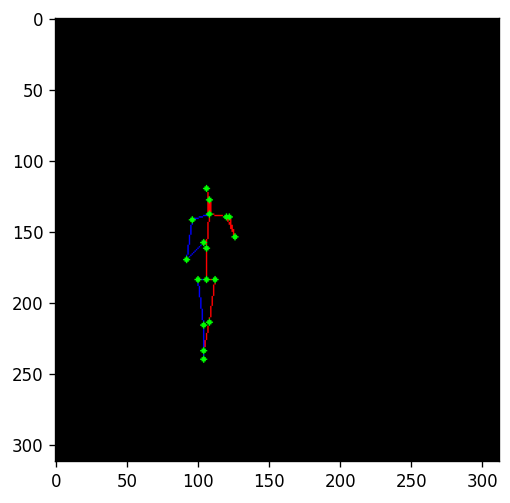

In [6]:
for idx in range(keypoints.shape[1]):

    kps = keypoints[0][idx]
    max_dim = round(np.max(kps)*1.3)

    # Creating a black screen image using numpy.zeros function
    img = np.zeros((max_dim, max_dim, 3), dtype='uint8')

    connections = [[0, 1], [1, 2], [2, 3], [0, 4], [4, 5],
                       [5, 6], [0, 7], [7, 8], [8, 9], [9, 10],
                       [8, 11], [11, 12], [12, 13], [8, 14], [14, 15], [15, 16]]

    LR = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], dtype=bool)

    lcolor = (255, 0, 0)
    rcolor = (0, 0, 255)
    base_thickness = 1

    for j,c in enumerate(connections):
        start = map(int, kps[c[0]])
        end = map(int, kps[c[1]])
        start = list(start)
        end = list(end)

        if j in [8]:  
            thickness = 2
        else:
            thickness = base_thickness


        cv2.line(img, (start[0], start[1]), (end[0], end[1]), lcolor if LR[j] else rcolor, thickness)
        cv2.circle(img, (start[0], start[1]), thickness=-1, color=(0, 255, 0), radius=2)
        cv2.circle(img, (end[0], end[1]), thickness=-1, color=(0, 255, 0), radius=2)


    # Display the image
    clear_output(wait=True)
    plt.rcParams['figure.dpi'] = 120
    im = plt.imshow(img)
    plt.show()


In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import imageio

# Define the output GIF filename
output_gif = 'turning_2D_visualization.gif'
frames = []

# Loop through each frame to visualize the skeleton and save frames for the GIF
for idx in range(keypoints.shape[1]):

    kps = keypoints[0][idx]
    max_dim = round(np.max(kps) * 1.3)

    # Creating a black screen image using numpy.zeros function
    img = np.zeros((max_dim, max_dim, 3), dtype='uint8')

    connections = [[0, 1], [1, 2], [2, 3], [0, 4], [4, 5],
                   [5, 6], [0, 7], [7, 8], [8, 9], [9, 10],
                   [8, 11], [11, 12], [12, 13], [8, 14], [14, 15], [15, 16]]

    LR = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], dtype=bool)

    lcolor = (255, 0, 0)
    rcolor = (0, 0, 255)
    base_thickness = 1

    for j, c in enumerate(connections):
        start = list(map(int, kps[c[0]]))
        end = list(map(int, kps[c[1]]))

        # Skip if either start or end is (0,0)
        if start == [0, 0] or end == [0, 0]:
            continue

        if j in [8]:
            thickness = 2
        else:
            thickness = base_thickness

        cv2.line(img, (start[0], start[1]), (end[0], end[1]), lcolor if LR[j] else rcolor, thickness)
        cv2.circle(img, (start[0], start[1]), thickness=-1, color=(0, 255, 0), radius=2)
        cv2.circle(img, (end[0], end[1]), thickness=-1, color=(0, 255, 0), radius=2)

    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.imshow(img)
    plt.title(f'Frame {idx + 1}/{keypoints.shape[1]}')

    # Save the current frame as an image to add to the GIF
    frame_path = f'frame_{idx}.png'
    plt.savefig(frame_path)
    plt.close()

    # Read the saved image and append to frames for GIF creation
    frames.append(imageio.v2.imread(frame_path))

# Save the frames as an animated GIF
imageio.mimsave(output_gif, frames, fps=10)
print(f"Animation saved as {output_gif}")

Animation saved as turning_2D_visualization.gif
